**Data Challenge 5: Ashley Anderson**
<br>**GitHub Link: https://github.com/ashleymaree/DataChallenge5.git**

In [43]:
## load in required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
## read in data
austin_listings = pd.read_csv('listings.csv')
austin_reviews = pd.read_csv('reviews.csv')

Text(0.5, 1.0, 'Histogram of Private Room AirBnBs in Austin, TX \n ≤ $100/night')

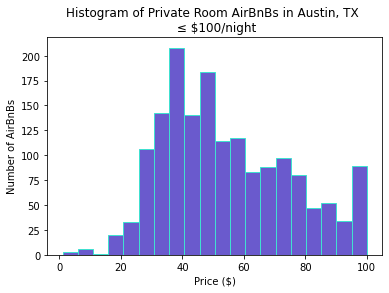

In [33]:
austin_cut = austin_listings[austin_listings.price <= 100] ## cut data to look at listings less than or equal to $100/night
set_home = austin_cut[austin_cut.room_type == 'Private room'] ## subset listings data to look only at private rooms
price = set_home['price'] ## subset price column from listings data
plt.hist(price, ## plot histogram of AirBnB prices in Austin
         20, ## set number of bins to 20
         color = 'slateblue', ## set color of bins to slate blue
         edgecolor = 'turquoise') ## set edge color of bins to turquoise
plt.xlabel('Price ($)') ## add x-axis label
plt.ylabel('Number of AirBnBs') ## add y-axis label
plt.title('Histogram of Private Room AirBnBs in Austin, TX \n \u2264 $100/night') ## add graph title

**Figure 1:** This figure represents the number of Private Room AirBnB listings in Austin, TX $\le$ \\$100/night. For a private room in a shared home, it can be assumed one would not be willing to pay more than \\$100/night hence the cutoff of \\$100/night. The data is slightly skewed left with very few listings below ~$40. There is a spike in listings at \\$100 which one might assume is a common price to list a room at and the pricing does not follow a graident. 

Text(0.5, 1.0, 'Prices of Entire Home/Apt Listings in Austin, TX \n≤ $300/night by Positional Coordinates')

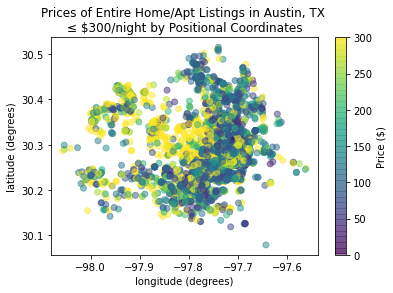

In [37]:
set_home = austin_listings[austin_listings.room_type == 'Entire home/apt'] ## subset listings data to look only at enitre homes
set_home.price.describe() ## viewed the describe data to see where the upper quartile cut-off was to better visualize data
lat = set_home['latitude'] ## create variable latitude from dataset
long = set_home['longitude'] ## create variable longitude from dataset
price = set_home['price'] ## create variable price from dataset
plt.scatter(long, ## initiate scatter plot with longitude on x-axis
            lat, ## add variable latitude to y-axis
            c = price, ## color scatter plot by price
            alpha = 0.5) ## add transparency to points
plt.colorbar(label = 'Price ($)') ## add label to colorbar
plt.clim(0, 300) ## limit colorbar to homes less than the upper quartile cut-off (~$300)
plt.xlabel('longitude (degrees)') ## label x-axis
plt.ylabel('latitude (degrees)') ## label y-axis
plt.title('Prices of Entire Home/Apt Listings in Austin, TX \n\u2264 $300/night by Positional Coordinates') ## add title

**Figure 2:** This figure represents the location (via longitude and latitude coordinates) of "Entire Home/Apartment" AirBnB listings in Austin, TX $\le$ \\$300/night. \\$300/night and below represents 75% of the AirBnB data so that was used as the cutoff. It appears a majority of the high price listings are around 30.3, -97.8. This is approximately the location of downtown Austin. The slight "S Curve" around 30.4, -98.05 may be representative of homes on the Colorado River as the river is a desireable place to rent a home on.

Text(0.5, 1.0, 'Number of AirBnB Listings in Austin, TX \nfor Each Home Type by ZIP Code')

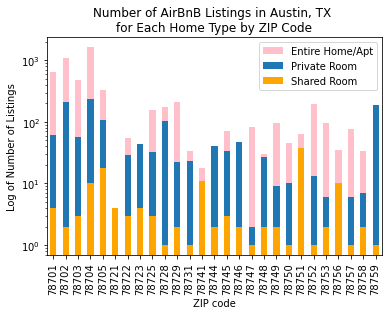

In [152]:
set_home = austin_listings[austin_listings.room_type == 'Entire home/apt'].groupby('neighbourhood').count() ## create separate dataset for "Entire home/apt" room types
set_private = austin_listings[austin_listings.room_type == 'Private room'].groupby('neighbourhood').count() ## create separate dataset for "Private room" room types
set_shared = austin_listings[austin_listings.room_type == 'Shared room'].groupby('neighbourhood').count() ## create separate dataset for "Shared room" room types
ax = set_home.plot.bar(y = 'id', color = 'pink') ## initiate bar plot with number of Entire home/apt listings by ZIP code 
ax_2 = set_private.plot.bar(y = 'id', ax = ax) ## add bars for number of private room listings by ZIP code
final = set_shared.plot.bar(y = 'id', color = 'orange', ax = ax_2) ## add bars for number of shared room listings by ZIP code
final.set_yscale('log') ## scale y-axis by log values for better visibility of data
plt.legend(['Entire Home/Apt', 'Private Room', 'Shared Room']) ## update legend to refer to each room type
plt.xlabel('ZIP code') ## add x-axis label
plt.ylabel('Log of Number of Listings') ## add y-axis label
plt.title('Number of AirBnB Listings in Austin, TX \nfor Each Home Type by ZIP Code') ## add title

**Figure 3:** *Note: There is something wrong with the plotting of the bar graphs, but the description is for what is pictured.* The figure shown above represents the number of AirBnB listings (by room type) in Austin, TX by ZIP code. ZIP codes 78701, 78702, 78703 and 78704 have the highest number of listings; representing downtown Austin. Across the downtown ZIP codes, the room types are pretty split across entire homes, private rooms and shared rooms. Shared rooms seem to be less common outside of the downtown ZIP codes with a few exceptions.

Text(0, 0.5, 'Month Review Was Written')

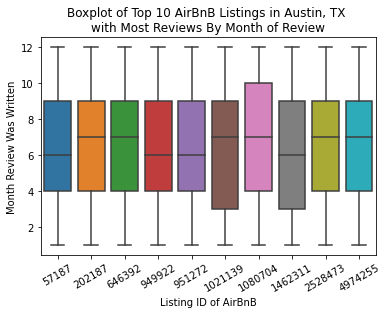

In [110]:
austin_merge = pd.merge(austin_reviews, ## select first data frame as "left" data frame
                          austin_listings, ## select second data frame as "right" data frame
                          left_on = 'listing_id', ## use column "listing_id" from austin_reviews to join data frames since data frames have different column headers
                          right_on = 'id', ## use column "id" from austin_listings to join data frames since data frames have different column headers
                          how = 'left')
austin_merge['date'] = pd.to_datetime(austin_merge['date'])
austin_merge['month'] = austin_merge['date'].dt.month ## add new column for year of review
austin_merge_topten = austin_merge.groupby('listing_id').count().nlargest(10,'number_of_reviews')
austin_merge_topten ## Find top 10 listings with most reviews: 1021139, 1462311, 949922, 202187, 951272, 2528473, 4974255, 57187, 1080704, and 646392
##Subset dataset to only have top 10 listings
austin_merge_final = austin_merge.loc[(austin_merge['listing_id'] == 1021139) | (austin_merge['listing_id'] == 1462311) | (austin_merge['listing_id'] == 949922) | (austin_merge['listing_id'] == 202187) | (austin_merge['listing_id'] == 951272) | (austin_merge['listing_id'] == 2528473) | (austin_merge['listing_id'] == 4974255) | (austin_merge['listing_id'] == 57187) | (austin_merge['listing_id'] == 1080704) | (austin_merge['listing_id'] == 646392)]
merge_plot = sns.boxplot(x = 'listing_id', ## initiate boxplot with top 10 listing ids as x-axis
                         y = 'month', ## graph month of review on y-axis
                         data = austin_merge_final) ## used final merged dataset with subset of top 10 listings
merge_plot.set_xticklabels(merge_plot.get_xticklabels(),rotation = 30) ## rotate x-axis ticks for better visibility
plt.title('Boxplot of Top 10 AirBnB Listings in Austin, TX \nwith Most Reviews By Month of Review') ## add title
plt.xlabel('Listing ID of AirBnB') ## add x-axis label
plt.ylabel('Month Review Was Written') ## add y-axis label

**Figure 4:** This figure represents the 10 AirBnB listings in Austin, TX with the most reviews. Each box represents the spread of when each review was written for each listing. Assuming the review is written soon after the individual stayed in the AirBnB, it appears most stays occur in the month of June and July. Austin being a warm climate, it appears there are stays that do happen year-round with each bar stretching the full calendar year. 

[Text(0, 0, '0 - 100'),
 Text(0, 0, '101 - 200'),
 Text(0, 0, '201 - 300'),
 Text(0, 0, '301 - 400'),
 Text(0, 0, '401 - 500'),
 Text(0, 0, '500-600'),
 Text(0, 0, '600+')]

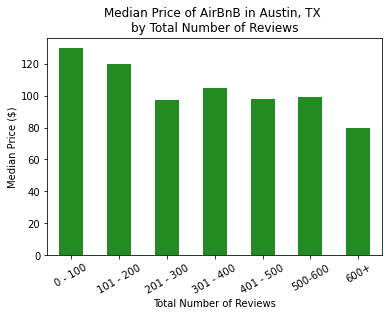

In [144]:
cut_values = [0, 100, 200, 300, 400, 500, 600, 1000] ## group number of reviews into categories for better visibility
cut_labels = ['0 - 100', '101 - 200', '201 - 300', '301 - 400', '401 - 500', '500-600', '600+'] ## label groups
austin_listings['cat'] = pd.cut(austin_listings['number_of_reviews'], bins = cut_values, labels = cut_labels) ## add column in dataframe for category of listing
## plot category by price finding the median of the price for each category and then initiate bar plot changing the color to forest green
median_cat = austin_listings.groupby(['cat'])['price'].median().plot.bar(color = 'forestgreen')
plt.title('Median Price of AirBnB in Austin, TX \nby Total Number of Reviews') ## add chart title
plt.ylabel('Median Price ($)') ## add y-axis label
plt.xlabel('Total Number of Reviews') ## add x-axis label
median_cat.set_xticklabels(median_cat.get_xticklabels(),rotation = 30) ## rotate x-axis ticks for better visibility

**Figure 5:** This figure represents the AirBnB listings in Austin, TX grouped into categories based on how many reviews the listing has. For each category, the median price of all listings in that category is graphed. It appears listings with less reviews tend to be more expensive. This could be explained by individuals that feel they get "more for their money" are more likely to write a review. One potential confounding variable that could be explored further would be when the listing was posted (newer listings will automatically have less reviews).